In [1]:
%%time
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
from OpenVisus import *
from backend_v2 import *

from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo
import metpy.calc as mpcalc
from metpy.units import units
from metpy.interpolate import cross_section

Starting OpenVisus /Users/aashishpanta/opt/anaconda3/lib/python3.9/site-packages/OpenVisus/__init__.py 3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ] sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0) ...
CPU times: user 1.45 s, sys: 146 ms, total: 1.59 s
Wall time: 1.8 s


In [2]:
%%time
ds = xr.open_dataset(get_test_data('narr_example.nc', False))
ds= ds.metpy.parse_cf().squeeze()
ds

CPU times: user 148 ms, sys: 19.3 ms, total: 167 ms
Wall time: 179 ms


<xarray.Dataset>
Dimensions:              (isobaric: 29, y: 118, x: 292)
Coordinates:
    time                 datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * y                    (y) float64 -3.087e+06 -3.054e+06 ... 7.114e+05
  * x                    (x) float64 -3.977e+06 -3.945e+06 ... 5.47e+06
    metpy_crs            object Projection: lambert_conformal_conic
Data variables:
    Temperature          (isobaric, y, x) float32 ...
    Lambert_Conformal    |S1 ...
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
    u_wind               (isobaric, y, x) float32 ...
    v_wind               (isobaric, y, x) float32 ...
    Geopotential_height  (isobaric, y, x) float32 ...
    Specific_humidity    (isobaric, y, x) float32 ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter:    The North American Regional Reanalysis (NARR) P...
    Generating_Model:         North American Regional Reanalysis (NARR)
    Product_Type:             Forecast/Uninitialized Analysis/Image Product
    title:                    US National Weather Service - NCEP(WMC) North A...
    ...                       ...
    history:                  Direct read of GRIB-1 into NetCDF-Java 4 API
    CF:feature_type:          GRID
    file_format:              GRIB-1
    location:                 /nomads3_data/raid2/noaaport/merged/narr/198704...
    _CoordinateModelRunDate:  1987-04-04T18:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...

In [3]:
%%time
filename='dummy.idx'
field=[Field('Temperature', 'float32'),
      Field('lat', 'float64'),
      Field('lon', 'float64'),
      Field('u_wind', 'float32'),
      Field('v_wind', 'float32'),
      Field('u_wind', 'float32'),
      Field('Geopotential_height', 'float32'),
      Field('Specific_humidity', 'float32')]

CPU times: user 45 µs, sys: 13 µs, total: 58 µs
Wall time: 59.8 µs


In [4]:
%%time
db=CreateIdx(url=filename,dims=[292,118,29],fields=field)


CPU times: user 1.56 ms, sys: 1.03 ms, total: 2.59 ms
Wall time: 2.02 ms


In [5]:
%%time
for f in db.getFields():
    db.write(ds[f].values, field=f)

CPU times: user 36.6 ms, sys: 19.2 ms, total: 55.7 ms
Wall time: 57.1 ms


In [6]:
%%time
data = xr.open_dataset("dummy.idx",engine=OpenVisusBackendEntrypoint,dims=ds.dims,coords=ds.coords )
data=data.isel(isobaric=slice(0,29),y=slice(0,118),x=slice(0,292))
# data['lon']=data.lon[0,:,:]
# data['lat']=data.lat[0,:,:]
data

Adding field  Temperature shape  [29, 118, 292] dtype  float32 labels  ['isobaric', 'y', 'x'] timesteps  [0] Max Resolution  21
Adding field  lat shape  [29, 118, 292] dtype  float64 labels  ['isobaric', 'y', 'x'] timesteps  [0] Max Resolution  21
Adding field  lon shape  [29, 118, 292] dtype  float64 labels  ['isobaric', 'y', 'x'] timesteps  [0] Max Resolution  21
Adding field  u_wind shape  [29, 118, 292] dtype  float32 labels  ['isobaric', 'y', 'x'] timesteps  [0] Max Resolution  21
Adding field  v_wind shape  [29, 118, 292] dtype  float32 labels  ['isobaric', 'y', 'x'] timesteps  [0] Max Resolution  21
Adding field  u_wind shape  [29, 118, 292] dtype  float32 labels  ['isobaric', 'y', 'x'] timesteps  [0] Max Resolution  21
Adding field  Geopotential_height shape  [29, 118, 292] dtype  float32 labels  ['isobaric', 'y', 'x'] timesteps  [0] Max Resolution  21
Adding field  Specific_humidity shape  [29, 118, 292] dtype  float32 labels  ['isobaric', 'y', 'x'] timesteps  [0] Max Resoluti

<xarray.Dataset>
Dimensions:              (isobaric: 29, y: 118, x: 292)
Coordinates:
    metpy_crs            object ...
    time                 datetime64[ns] ...
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * y                    (y) float64 -3.087e+06 -3.054e+06 ... 7.114e+05
  * x                    (x) float64 -3.977e+06 -3.945e+06 ... 5.47e+06
Data variables:
    Temperature          (isobaric, y, x) float32 ...
    lat                  (isobaric, y, x) float64 ...
    lon                  (isobaric, y, x) float64 ...
    u_wind               (isobaric, y, x) float32 ...
    v_wind               (isobaric, y, x) float32 ...
    Geopotential_height  (isobaric, y, x) float32 ...
    Specific_humidity    (isobaric, y, x) float32 ...

In [7]:
%%time
start = (37.0, -105.0)
end = (35.5, -65.0)
cross = cross_section(data, start, end).set_coords(('lat', 'lon'))
data['lon']=data.lon[0,:,:]
data['lat']=data.lat[0,:,:]
# data

_raw_indexing_method key (slice(0, 29, 1), slice(48, 80, None), slice(126, 239, None))
_raw_indexing_method key (slice(0, 29, 1), slice(0, 118, 1), slice(0, 292, 1))
Using Max Resolution:  21
_raw_indexing_method key (slice(0, 29, 1), slice(48, 80, None), slice(126, 239, None))
_raw_indexing_method key (slice(0, 29, 1), slice(0, 118, 1), slice(0, 292, 1))
Using Max Resolution:  21
_raw_indexing_method key (slice(0, 29, 1), slice(48, 80, None), slice(126, 239, None))
_raw_indexing_method key (slice(0, 29, 1), slice(0, 118, 1), slice(0, 292, 1))
Using Max Resolution:  21
_raw_indexing_method key (slice(0, 29, 1), slice(48, 80, None), slice(126, 239, None))
_raw_indexing_method key (slice(0, 29, 1), slice(0, 118, 1), slice(0, 292, 1))
Using Max Resolution:  21
_raw_indexing_method key (slice(0, 29, 1), slice(48, 80, None), slice(126, 239, None))
_raw_indexing_method key (slice(0, 29, 1), slice(0, 118, 1), slice(0, 292, 1))
Using Max Resolution:  21
_raw_indexing_method key (slice(0, 29, 1

In [8]:
%%time
cross = cross_section(data, start, end).set_coords(('lat', 'lon'))

CPU times: user 685 ms, sys: 14.3 ms, total: 699 ms
Wall time: 699 ms


In [9]:
%%time
cross['Potential_temperature'] = mpcalc.potential_temperature(
    cross['isobaric'],
    cross['Temperature']*units.kelvin
)
cross['Relative_humidity'] = mpcalc.relative_humidity_from_specific_humidity(
    cross['isobaric'],
    cross['Temperature']*units.kelvin,
    cross['Specific_humidity']
)
cross['u_wind']=cross['u_wind']*(units.meter/units.second)
cross['v_wind']=cross['v_wind']*(units.meter/units.second)
cross['u_wind'] = cross['u_wind'].metpy.convert_units('knots')
cross['v_wind'] = cross['v_wind'].metpy.convert_units('knots')
cross['t_wind'], cross['n_wind'] = mpcalc.cross_section_components(
    cross['u_wind'],
    cross['v_wind']
)

cross

CPU times: user 25.4 ms, sys: 1.27 ms, total: 26.7 ms
Wall time: 25.9 ms


Magnitude,[[-5.304452352369622 0.9284748187705014 -0.6548776704717142 ... -15.404757939953184 -15.56302862563321 -17.071137296642938] [-5.308167210178934 0.9203170427109245 -0.6565652837701681 ... -15.642972225554518 -15.76107239236605 -17.206155427765957] [-5.3025244060193915 0.930402765120731 -0.6529497241214848 ... -12.02292749099525 -12.134891011495736 -13.156987341750659] ... [21.81573821533864 23.57662916337854 24.044959456472725 ... 72.36756196262704 72.99770390535004 72.56693318468069] [20.611460154213056 21.792457513404266 21.866930321203053 ... 61.80663229459888 61.89613367381331 61.44757336309087] [20.760849844784733 20.87970427725851 20.01181090534093 ... 48.337166217001226 47.8246300324939 46.03015512093413]]
Units,knot
Magnitude,[[16.470476369926562 11.125195023944634 10.204518435020013 ... 25.12026988279153 24.45660047875413 23.157753627133793] [16.479189350897954 11.129279057171013 10.210629812583532 ... 26.48258606284322 25.816788588999973 24.6417645633265] [16.492536081826323 11.132640373444445 10.212785513545207 ... 28.640204269708057 28.169494336890054 27.324497956138632] ... [21.266504544819224 21.767777335955934 22.1915269742229 ... 7.7274175503994655 6.395603938611749 4.587033153354025] [18.39014908997746 18.233060453473673 17.664341191850472 ... 7.9875171293389835 6.929124268851199 5.3604481774782355] [8.915577631280842 8.51422828310277 7.666121106187648 ... -0.9773340268441592 -1.5396857779917947 -2.103638600466969]]
Units,knot
Magnitude,[[287.7170525300504 286.91152776774715 287.1564236647433 ... 291.4427453231828 291.28206241182005 291.06972426497373] [288.28950344641925 287.4838904767359 287.7257033918808 ... 291.5532656672969 291.4196753693297 291.23606477109803] [288.9854797524146 288.1780204849547 288.4279524993903 ... 292.139023492204 292.02234264709983 291.8874984956785] ... [369.6777506644047 368.85784890232463 368.1910386320287 ... 371.1470784960522 371.13039121514856 371.1261530989778] [387.8897214202701 387.46317359233177 387.0923830089991 ... 388.0710904114131 388.03417787584834 387.9902820771881] [415.7195439911303 415.53749196203023 415.3724137068711 ... 408.323476312708 408.2243286586851 408.1459236830185]]
Units,kelvin
Magnitude,[[0.6113830426216009 0.6195101281264803 0.5719778549689688 ... 0.7507220276716595 0.7604980526617816 0.7638327466599318] [0.6122243928651327 0.6205027515269513 0.5731702252501214 ... 0.7876021515450295 0.7987085584681852 0.7981607424718508] [0.6122867659483857 0.620518968238692 0.5727967959266055 ... 0.7717550323530847 0.7725858652257214 0.7730780790593141] ... [0.2366332150441788 0.2671936925228155 0.2986195923883378 ... 0.0755962586872537 0.07529050929084279 0.07506483476278808] [0.04234970461039488 0.04683996279980466 0.05321984842149339 ... 0.043824775564543395 0.04400763697244769 0.04426940339590324] [0.025368858584968044 0.026675489056944196 0.02823678729550893 ... 0.0438019111999825 0.0444017977559957 0.04497749099521076]]
Units,dimensionless
Magnitude,[[-2.026601055482784 3.070015501565326 1.349644568726394 ... -7.221954028565826 -7.536139096083578 -9.329973715310427] [-2.028564831190623 3.062805477953067 1.3491823618314918 ... -7.0435160814621876 -7.318310083963533 -9.01316676250086] [-2.0204526754730647 3.073351793863057 1.3531491638112914 ... -2.9450756013985693 -3.154456442643095 -4.345314889797461] ... [25.50935056071517 27.35305318050488 27.91420812038844 ... 71.38383412446858 71.56921996166784 70.59573829010421] [23.772680446701116 24.916783463578025 24.89436901682552 ... 61.37989162154403 61.1353637028837 60.2216967173883] [22.091038651755312 22.135139708939782 21.123280646217818 ... 45.851340760603996 45.17508046244225 43.27450155652905]]
Units,knot
Magnitude,[[17.184489947996273 10.733453993474885 10.136050551968113 ... 28.56882752550611 27.991780481136885 27.21501188916658] [17.193756003841163 10.739043644371234 10.142373789995842 ... 29.940254271391076 29.348940586015708 28.671085963217426] [17.20576305988631 10.74038359375252 10.14378226444

<timed exec>:26: UserWarning: FixedFormatter should only be used together with FixedLocator


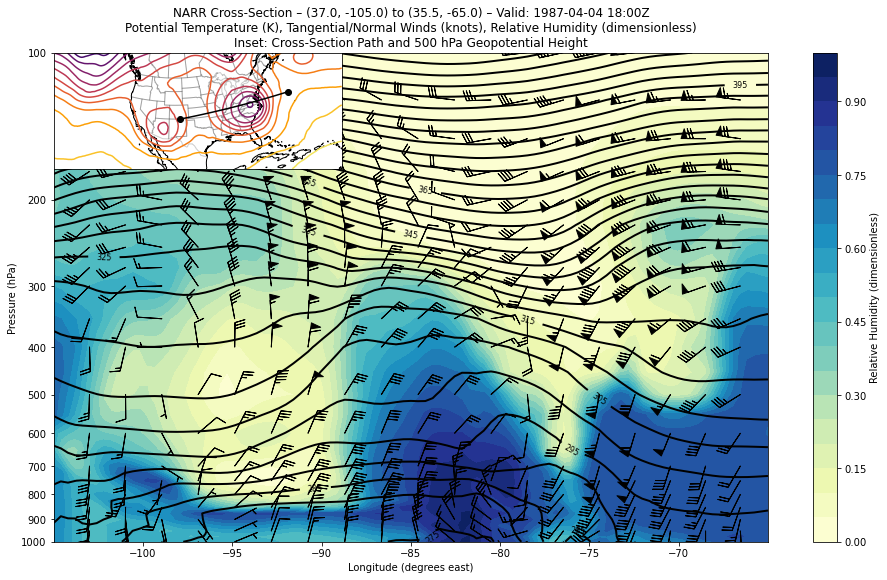

CPU times: user 857 ms, sys: 11.4 ms, total: 869 ms
Wall time: 870 ms


In [10]:
%%time
# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon'], cross['isobaric'], cross['Relative_humidity'],
                         levels=np.arange(0, 1.05, .05), cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)

# Plot potential temperature using contour, with some custom labeling
theta_contour = ax.contour(cross['lon'], cross['isobaric'], cross['Potential_temperature'],
                           levels=np.arange(250, 450, 5), colors='k', linewidths=2)
theta_contour.clabel(theta_contour.levels[1::2], fontsize=8, colors='k', inline=1,
                     inline_spacing=8, fmt='%i', rightside_up=True, use_clabeltext=True)

# Plot winds using the axes interface directly, with some custom indexing to make the barbs
# less crowded
wind_slc_vert = list(range(0, 19, 2)) + list(range(19, 29))
wind_slc_horz = slice(5, 100, 5)
ax.barbs(cross['lon'][wind_slc_horz], cross['isobaric'][wind_slc_vert],
         cross['t_wind'][wind_slc_vert, wind_slc_horz],
         cross['n_wind'][wind_slc_vert, wind_slc_horz], color='k')

# Adjust the y-axis to be logarithmic
ax.set_yscale('symlog')
ax.set_yticklabels(np.arange(1000, 50, -100))
ax.set_ylim(cross['isobaric'].max(), cross['isobaric'].min())
ax.set_yticks(np.arange(1000, 50, -100))

# Define the CRS and inset axes
data_crs = data['Geopotential_height'].metpy.cartopy_crs
ax_inset = fig.add_axes([0.125, 0.665, 0.25, 0.25], projection=data_crs)

# Plot geopotential height at 500 hPa using xarray's contour wrapper
ax_inset.contour(data['x'], data['y'], data['Geopotential_height'].sel(isobaric=500.),
                 levels=np.arange(5100, 6000, 60), cmap='inferno')

# Plot the path of the cross section
endpoints = data_crs.transform_points(ccrs.Geodetic(),
                                      *np.vstack([start, end]).transpose()[::-1])
ax_inset.scatter(endpoints[:, 0], endpoints[:, 1], c='k', zorder=2)
ax_inset.plot(cross['x'], cross['y'], c='k', zorder=2)

# Add geographic features
ax_inset.coastlines()
ax_inset.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='k', alpha=0.2, zorder=0)

# Set the titles and axes labels
ax_inset.set_title('')
ax.set_title(f'NARR Cross-Section \u2013 {start} to {end} \u2013 '
             f'Valid: {cross["time"].dt.strftime("%Y-%m-%d %H:%MZ").item()}\n'
             'Potential Temperature (K), Tangential/Normal Winds (knots), Relative Humidity '
             '(dimensionless)\nInset: Cross-Section Path and 500 hPa Geopotential Height')
ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('Longitude (degrees east)')
rh_colorbar.set_label('Relative Humidity (dimensionless)')

plt.show()